In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Carregando os dados de treinamento e teste
train_df = pd.read_csv("train_audience.csv")  # Carregando dados de treino
test_df = pd.read_csv("test_audience.csv")

distinct_rating = train_df["Rating"].unique()
distinct_rating_dict = {}
for index, label in enumerate(distinct_rating):
    distinct_rating_dict[label] = index


distinct_rating_test = test_df["Rating"].unique()
distinct_rating_dict_test = {}
for index, label in enumerate(distinct_rating_test):
    distinct_rating_dict_test[label] = index

train_df['Rating'] = train_df["Rating"].replace(distinct_rating_dict)
test_df['Rating'] = test_df["Rating"].replace(distinct_rating_dict_test)


train_set, val_set = train_test_split(train_df, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features = 3000) 

x_train = vectorizer.fit_transform(train_set['Review']).toarray()
y_train = train_set['Rating'].astype(int)

x_val = vectorizer.transform(val_set["Review"]).toarray()
y_val = val_set["Rating"].astype(int)

x_test = vectorizer.transform(test_df['Review']).toarray()
y_test = test_df['Rating'].astype(int)

2024-11-27 01:22:57.397562: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 01:22:57.405039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732681377.413852   18212 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732681377.416639   18212 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 01:22:57.425952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
classWeight = dict(np.max(y_train.value_counts()) / y_train.value_counts())

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_metrics(y, p):
    # Cálculo das métricas de acerto.
    print('Accuracy:', round(metrics.accuracy_score(y, p),3))
    print('Accuracy (balanced):', round(metrics.balanced_accuracy_score(y, p), 3))

    # Calculo da matriz de confusão.
    c = metrics.confusion_matrix(y, p)
    r = c / c.sum(axis=1, keepdims=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(r, annot=True, fmt=".2f", cmap="Blues")
    plt.xlabel("Classe predita")
    plt.ylabel("Classe verdadeira")
    plt.title("Matriz de confusão relativa")
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [250, 300, 350]
}
    
rfc = RandomForestClassifier(max_depth=20,random_state=42, class_weight=classWeight, min_samples_split=5)
grid = GridSearchCV(rfc, param_grid, cv=5,verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.22744
{'min_samples_split': 5, 'n_estimators': 250}
RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_estimators=250, random_state=42)


In [4]:
p_val = grid.best_estimator_.predict(x_val)

Accuracy: 0.361
Accuracy (balanced): 0.135


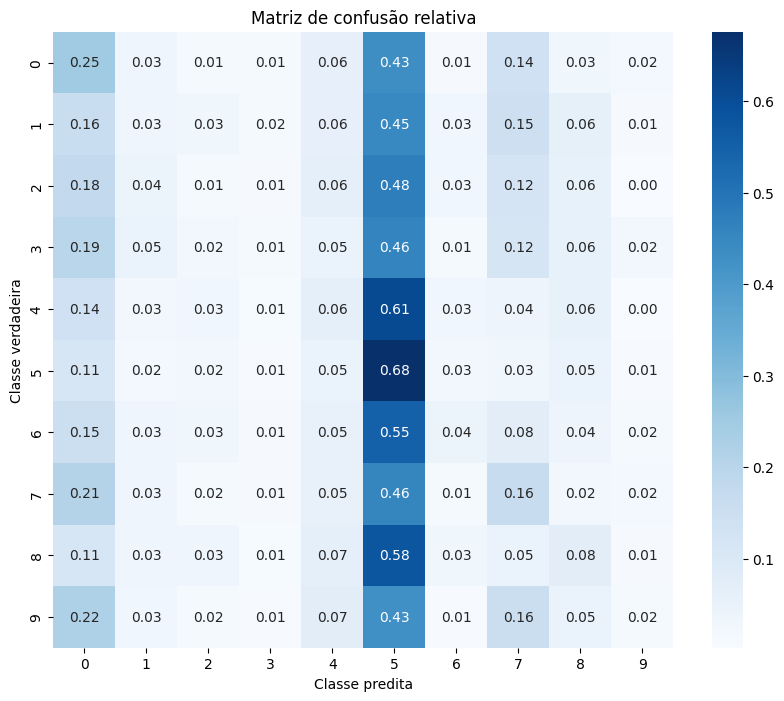

In [5]:
evaluate_metrics(y_val, p_val)

In [6]:
print(metrics.classification_report(y_val, p_val))

              precision    recall  f1-score   support

         0.0       0.22      0.25      0.23      1445
         1.0       0.04      0.03      0.04       322
         2.0       0.03      0.01      0.02       433
         3.0       0.07      0.01      0.02       534
         4.0       0.09      0.06      0.07       766
         5.0       0.52      0.68      0.59      4672
         6.0       0.08      0.04      0.05       463
         7.0       0.14      0.16      0.15       658
         8.0       0.12      0.08      0.09       799
         9.0       0.05      0.02      0.02       392

    accuracy                           0.36     10484
   macro avg       0.14      0.13      0.13     10484
weighted avg       0.30      0.36      0.32     10484



In [7]:

p_test = grid.best_estimator_.predict(x_test)

Accuracy: 0.124
Accuracy (balanced): 0.103


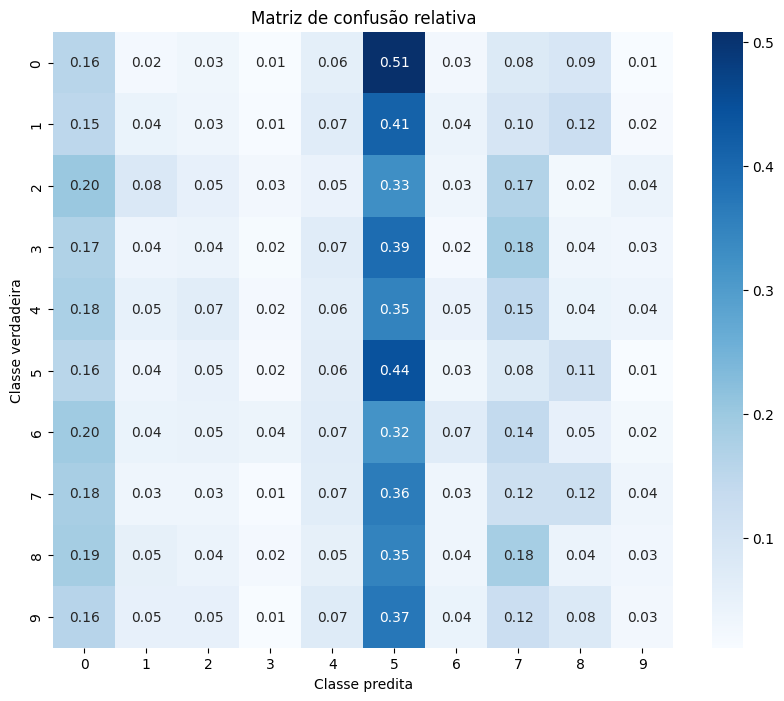

In [8]:
evaluate_metrics(y_test, p_test)

In [9]:
print(metrics.classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.42      0.16      0.23      5766
           1       0.09      0.04      0.06       958
           2       0.05      0.05      0.05       478
           3       0.14      0.02      0.03      1799
           4       0.05      0.06      0.05       684
           5       0.08      0.44      0.13       974
           6       0.07      0.07      0.07       389
           7       0.05      0.12      0.07       636
           8       0.03      0.04      0.04       883
           9       0.05      0.03      0.03       538

    accuracy                           0.12     13105
   macro avg       0.10      0.10      0.08     13105
weighted avg       0.23      0.12      0.13     13105

